In [11]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.optimize as sp

rc('text', usetex=True)
rc('font', size=16)
rc("pgf", preamble="\n".join([ # plots will use this preamble
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage{siunitx}",
        r"\usepackage{amsmath}",
   ]))

In [12]:
def savepdf_tex(fig, name, **kwargs):
    import subprocess, os
    fig.savefig("temp.svg", format="svg", **kwargs)
    incmd = ["inkscape", "temp.svg", "--export-pdf={}.pdf".format(name),
             "--export-latex"] #"--export-ignore-filters",
    subprocess.check_output(incmd)
    os.remove("temp.svg")

In [13]:
def ax_b(x, a, b):
    return a * np.power(x, b)

[10000, 9000, 3000, 4000, 6000, 20000, 8000, 1000, 5000, 7000, 2000] [0.623993, 0.501464, 0.0486105, 0.09094999999999999, 0.21534899999999998, 4.196037, 0.39520049999999995, 0.0039225, 0.1459315, 0.21580749999999999, 0.019691999999999998]
$y = ax^b$
[1.52157663e-11 2.65988785e+00]



(inkscape:125542): Gtk-WARNING **: 22:11:16.200: Theme parsing error: gtk-contained-dark.css:2871:228: Missing closing bracket for :not()


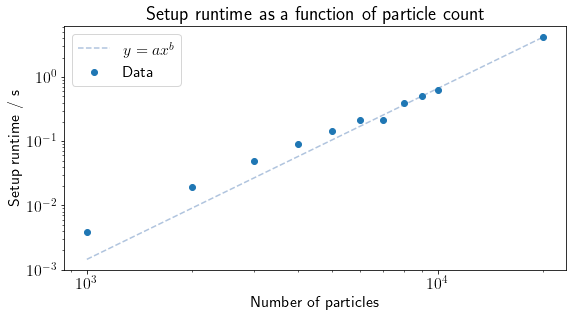

In [14]:
fig = plt.figure(figsize=(9, 4.5))

files = glob.glob("../data/0p3*")
x = []
y = []

for f in files:
    n = int(f[22:-8])
    arr = np.loadtxt(f)
    x.append(n)
    y.append(np.median(arr) *1e-6)

print(x, y)


popt, pcov = sp.curve_fit(ax_b, x, y, p0=[1, 2])
label = "$y = ax^b$"
print(label)

plt.plot([1000, 20000], ax_b([1000, 20000], popt[0], popt[1]), 
    linestyle='dashed',
    label=label,
    color='lightsteelblue')

plt.xlabel("Number of particles")
plt.ylabel("Setup runtime / s")
plt.title("Setup runtime as a function of particle count")

plt.scatter(x, y, zorder=100, label="Data")


print(popt)

plt.loglog()
plt.legend()

savepdf_tex(fig, "density_time")